# CELLEX

In [1]:
import pandas as pd
import cellex
import h5py
import pyreadr
import scanpy as sc
from pathlib import Path
from functools import reduce

In [ ]:
DATA_DIR = ''

First load the metadata

In [2]:
%%time
metadata_file = f'{DATA_DIR}/df_cell.RDS'
result = pyreadr.read_r(metadata_file) 
metadata = result[None] 
metadata = metadata[metadata['Organ']=='Cerebellum'].reset_index(drop=True)
dropped_metadata = metadata[metadata['Organ_cell_lineage'].notna()]
display(dropped_metadata['Organ_cell_lineage'].unique())

array(['Cerebellum-Purkinje neurons',
       'Cerebellum-Inhibitory interneurons', 'Cerebellum-Granule neurons',
       'Cerebellum-Astrocytes', 'Cerebellum-Vascular endothelial cells',
       'Cerebellum-Unipolar brush cells', 'Cerebellum-Microglia',
       'Cerebellum-Oligodendrocytes',
       'Cerebellum-SLC24A4_PEX5L positive cells'], dtype=object)

CPU times: user 33.2 s, sys: 2.22 s, total: 35.4 s
Wall time: 35.5 s


In [3]:
dropped_metadata.groupby('Organ_cell_lineage').size()

Organ_cell_lineage
Cerebellum-Astrocytes                      268809
Cerebellum-Granule neurons                 312675
Cerebellum-Inhibitory interneurons         129890
Cerebellum-Microglia                         4428
Cerebellum-Oligodendrocytes                 16104
Cerebellum-Purkinje neurons                280377
Cerebellum-SLC24A4_PEX5L positive cells     19722
Cerebellum-Unipolar brush cells             52646
Cerebellum-Vascular endothelial cells        7349
dtype: int64

In [4]:
genename_file = f'{DATA_DIR}/df_gene.RDS'
genenames_df = pyreadr.read_r(genename_file) 
genenames_df = genenames_df[None] 
genenames = genenames_df['gene_id'].str.split('.').str[0]

In [5]:
genenames

0        ENSG00000223972
1        ENSG00000227232
2        ENSG00000243485
3        ENSG00000237613
4        ENSG00000268020
              ...       
63556    ENSG00000240779
63557    ENSG00000244656
63558    ENSG00000263760
63559    ENSG00000222670
63560    ENSG00000251180
Name: gene_id, Length: 63561, dtype: object

## Sampling the data
The dataset was sampled multiple times since the descartes data is too large to completely analyse in one go.
This was done by running:

In [6]:
!Rscript Descartes_Human_Cerebellum.R # run this script in the direcory of the "Cerebellum_gene_count.RDS" file

For each sample we create an .esmu.csv file. The `SAMPLE` variable is the number of the sample.
In this case the dataset was sampled 9 times, so `SAMPLE` can range form 0 to 9.

In [7]:
h5file = f'{DATA_DIR}/Cerebellum_gene_count.h5'
with h5py.File(h5file, 'r') as f:
    print(f.keys())

<KeysViewHDF5 ['sample0', 'sample1', 'sample2', 'sample3', 'sample4', 'sample5', 'sample6', 'sample7', 'sample8', 'sample9']>


In [8]:
SAMPLE = 9 # the sampled data was saved in a .h5 file where the keys were named sample0, sample1, etc.

In [9]:
%%time
with h5py.File(h5file, 'r') as f:
    grpname = f.require_group(f'/sample{SAMPLE}')
    print(grpname.keys())
    colnames = list(f[f'/sample{SAMPLE}/colnames'])
colnames = [name.decode() for name in colnames]
sampledh5_df = sc.read_hdf(h5file, key=f'sample{SAMPLE}/data').to_df().T
sampledh5_df.index = genenames
sampledh5_df.columns = colnames

<KeysViewHDF5 ['colnames', 'data']>
CPU times: user 21.7 s, sys: 5.88 s, total: 27.6 s
Wall time: 27.6 s


In [10]:
sampledh5_df

,exp5-human-323well.TATGCGATTTTATATACTAA,exp5-human-349well.TTCTTAACCTTACTTACTTA,exp5-human-237well.GATACGTCTGGCCGTAGTC,exp5-human-583well.CTTCGACTTCATTCGACGG,exp5-human-385well.CTCCATCATGGAGGCCTCC,exp5-human-488well.TATTCGGCTAACGAGGCTA,exp5-human-114well.AGAGATGAATTTACCGAGGC,exp5-human-157well.TGATGCGATCTGATTAAGA,exp5-human-844well.AGGCATCATGCAGACCGGT,exp5-human-646well.AGATCGGATCATCAGAATG,...,exp5-human-822well.CCGTCGATTTTGGACGCTG,exp5-human-545well.CGATTCGCTCAATTACCGT,exp5-human-327well.CGGTAAGGTTGGCCATGCA,exp5-human-478well.AAACTCCAATTTGGATCCTT,exp5-human-191well.GAGACTAGTGGTCCAGGAG,exp5-human-563well.TTCGCGGATACGTCATATA,exp5-human-538well.AACTTGGATTTACGGCTACG,exp2-human-257_.AGATTGGTTTACTCAATAGG,exp4-human-2well.CGGTTCCATCTTGCAGTAG,exp5-human-590well.ACGCCATATCTGCTTCGAC
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000227232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000243485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000237613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000268020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000240779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000244656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000263760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
sampled_metadata = pd.merge(sampledh5_df.columns.to_frame().reset_index()[['index']],
                           dropped_metadata[['sample','Organ_cell_lineage']],
                           left_on='index', right_on='sample')
sampled_metadata['Organ_cell_lineage'].value_counts()

Cerebellum-Granule neurons                 4131
Cerebellum-Purkinje neurons                3614
Cerebellum-Astrocytes                      3384
Cerebellum-Inhibitory interneurons         1804
Cerebellum-Unipolar brush cells             752
Cerebellum-SLC24A4_PEX5L positive cells     269
Cerebellum-Oligodendrocytes                 196
Cerebellum-Vascular endothelial cells       100
Cerebellum-Microglia                         66
Name: Organ_cell_lineage, dtype: int64

In [12]:
sampled_metadata = sampled_metadata[['sample','Organ_cell_lineage']]
data = sampledh5_df.loc[:,sampledh5_df.columns.isin(sampled_metadata['sample'])]
sampled_metadata.set_index('sample', inplace=True)

In [13]:
display(data, sampled_metadata)

,exp5-human-323well.TATGCGATTTTATATACTAA,exp5-human-349well.TTCTTAACCTTACTTACTTA,exp5-human-583well.CTTCGACTTCATTCGACGG,exp5-human-488well.TATTCGGCTAACGAGGCTA,exp5-human-157well.TGATGCGATCTGATTAAGA,exp5-human-844well.AGGCATCATGCAGACCGGT,exp5-human-646well.AGATCGGATCATCAGAATG,exp5-human-354well.ATGGTAACTTTGCCGGCAGA,exp5-human-268well.TCATGGCTTCCTAGCGCCT,exp5-human-399well.TATTGACTCTTACTTACTTA,...,exp5-human-445well.GCAGATACTCATTATTACC,exp5-human-822well.CCGTCGATTTTGGACGCTG,exp5-human-327well.CGGTAAGGTTGGCCATGCA,exp5-human-478well.AAACTCCAATTTGGATCCTT,exp5-human-191well.GAGACTAGTGGTCCAGGAG,exp5-human-563well.TTCGCGGATACGTCATATA,exp5-human-538well.AACTTGGATTTACGGCTACG,exp2-human-257_.AGATTGGTTTACTCAATAGG,exp4-human-2well.CGGTTCCATCTTGCAGTAG,exp5-human-590well.ACGCCATATCTGCTTCGAC
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000227232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000243485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000237613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000268020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000240779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000244656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000263760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Organ_cell_lineage
sample,
exp5-human-323well.TATGCGATTTTATATACTAA,Cerebellum-Inhibitory interneurons
exp5-human-349well.TTCTTAACCTTACTTACTTA,Cerebellum-Granule neurons
exp5-human-583well.CTTCGACTTCATTCGACGG,Cerebellum-Granule neurons
exp5-human-488well.TATTCGGCTAACGAGGCTA,Cerebellum-Purkinje neurons
exp5-human-157well.TGATGCGATCTGATTAAGA,Cerebellum-Astrocytes
...,...
exp5-human-563well.TTCGCGGATACGTCATATA,Cerebellum-SLC24A4_PEX5L positive cells
exp5-human-538well.AACTTGGATTTACGGCTACG,Cerebellum-Astrocytes
exp2-human-257_.AGATTGGTTTACTCAATAGG,Cerebellum-Purkinje neurons


In [14]:
%%time
eso = cellex.ESObject(data=data,
                      annotation=sampled_metadata,
                      verbose=True)

Preprocessing - checking input ... input parsed in 0 min 0 sec
Preprocessing - running remove_non_expressed ... excluded 30788 / 63561 genes in 3 min 19 sec
Preprocessing - normalizing data ... data normalized in 0 min 9 sec
Preprocessing - running ANOVA ... excluded 22261 / 32773 genes in 0 min 12 sec
CPU times: user 27 s, sys: 6min 5s, total: 6min 32s
Wall time: 6min 26s


In [15]:
%%time
eso.compute(verbose=True)

Computing DET ... 
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 1 sec
Computing EP ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 0 sec
Computing GES ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 1 sec
Computing NSI ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 0 sec
Computing ESmu ...
    finished in 0 min 0 sec
Computing ESsd ...
    finished in 0 min 0 sec
Computed ['det.esw', 'det.esw_null', 'det.pvals', 'det.esw_s', 'ep.esw', 'ep.esw_null', 'ep.pvals', 'ep.esw_s', 'ges.esw', 'ges.esw_null', 'ges.pvals', 'ges.esw_s', 'nsi.esw', 'nsi.esw_null', 'nsi.pvals', 'nsi.esw_s', 'esmu', 'essd'].
CPU times: user 4.99 s, sys: 305 ms, total: 5.29 s
Wall time: 3.91 s


In [16]:
eso.results['esmu']

,Cerebellum-Astrocytes,Cerebellum-Granule neurons,Cerebellum-Inhibitory interneurons,Cerebellum-Microglia,Cerebellum-Oligodendrocytes,Cerebellum-Purkinje neurons,Cerebellum-SLC24A4_PEX5L positive cells,Cerebellum-Unipolar brush cells,Cerebellum-Vascular endothelial cells
gene,,,,,,,,,
ENSG00000237683,0.000000,0.000000,0.000000,0.776249,0.0,0.104118,0.000000,0.000000,0.000000
ENSG00000241860,0.000000,0.000000,0.000000,0.782571,0.0,0.000000,0.000000,0.000000,0.000000
ENSG00000225630,0.000000,0.101064,0.000000,0.000000,0.0,0.000000,0.112945,0.000000,0.289375
ENSG00000272438,0.000000,0.000000,0.575131,0.000000,0.0,0.088064,0.000000,0.000000,0.000000
ENSG00000187583,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.421336,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
ENSG00000215781,0.097624,0.000000,0.020542,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
ENSG00000212884,0.000000,0.152128,0.000000,0.482430,0.0,0.000000,0.000000,0.176454,0.000000
ENSG00000220023,0.000000,0.000000,0.000000,0.000000,0.0,0.200688,0.213336,0.000000,0.000000


In [18]:
out = f'{DATA_DIR}/Descartes_Human_Cerebellum_{SAMPLE}.esmu.csv'
eso.results["esmu"].to_csv(out)

After running this for each individual sample we can combine them.

## Combining the sampled esmu files

In [19]:
directory = DATA_DIR
df_list = []
for path in Path(directory).rglob('*[0-9].esmu.csv'): 
    n = path.stem[-6]
    df = pd.read_csv(path)
    df.set_index('gene', inplace=True)
    df = df.melt(ignore_index=False)
    df.rename(columns={'variable':'cell-type','value':f'ES{n}'}, inplace=True)
    df_list.append(df)
df_list = [df.reset_index() for df in df_list]   

In [20]:
df_merged = reduce(lambda left,right: pd.merge(left, right, on=['gene','cell-type']), df_list)
df_merged

,gene,cell-type,ES5,ES2,ES4,ES3,ES0,ES7,ES8,ES1,ES9,ES6
0,ENSG00000188290,Cerebellum-Astrocytes,0.315958,0.309456,0.281217,0.315586,0.255094,0.358018,0.303892,0.339244,0.303845,0.376421
1,ENSG00000187608,Cerebellum-Astrocytes,0.000000,0.000000,0.000000,0.000000,0.014743,0.000000,0.000000,0.000000,0.000000,0.023985
2,ENSG00000131584,Cerebellum-Astrocytes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000162576,Cerebellum-Astrocytes,0.659632,0.801970,0.683223,0.877475,0.868743,0.808745,0.837482,0.825251,0.877122,0.889428
4,ENSG00000179403,Cerebellum-Astrocytes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
63679,ENSG00000241859,Cerebellum-Vascular endothelial cells,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
63680,ENSG00000165246,Cerebellum-Vascular endothelial cells,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
63681,ENSG00000176728,Cerebellum-Vascular endothelial cells,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
63682,ENSG00000215781,Cerebellum-Vascular endothelial cells,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
df = df_merged.set_index(['gene','cell-type']).mean(axis=1).reset_index().pivot_table(index='gene',columns='cell-type')
df.columns = df.columns.droplevel()
df.columns = df.columns.str.replace(' ','_')
df

cell-type,Cerebellum-Astrocytes,Cerebellum-Granule_neurons,Cerebellum-Inhibitory_interneurons,Cerebellum-Microglia,Cerebellum-Oligodendrocytes,Cerebellum-Purkinje_neurons,Cerebellum-SLC24A4_PEX5L_positive_cells,Cerebellum-Unipolar_brush_cells,Cerebellum-Vascular_endothelial_cells
gene,,,,,,,,,
ENSG00000000003,0.462850,0.000000,0.000000,0.000000,0.004469,0.000000,0.000000,0.000000,0.235792
ENSG00000000971,0.000000,0.000000,0.000898,0.000000,0.021081,0.000000,0.006019,0.011538,0.894940
ENSG00000001460,0.000000,0.000000,0.000000,0.000000,0.000000,0.416415,0.244993,0.000524,0.000000
ENSG00000001461,0.000000,0.040927,0.000000,0.000000,0.000000,0.040102,0.318293,0.030923,0.000000
ENSG00000001561,0.000000,0.000000,0.000000,0.000000,0.016404,0.399651,0.092237,0.000000,0.014783
...,...,...,...,...,...,...,...,...,...
ENSG00000273274,0.000000,0.000000,0.008748,0.000000,0.000442,0.078156,0.282157,0.000000,0.000000
ENSG00000273291,0.445494,0.000000,0.000000,0.007647,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000273294,0.000000,0.044962,0.000000,0.000000,0.000000,0.000000,0.206065,0.039654,0.000000


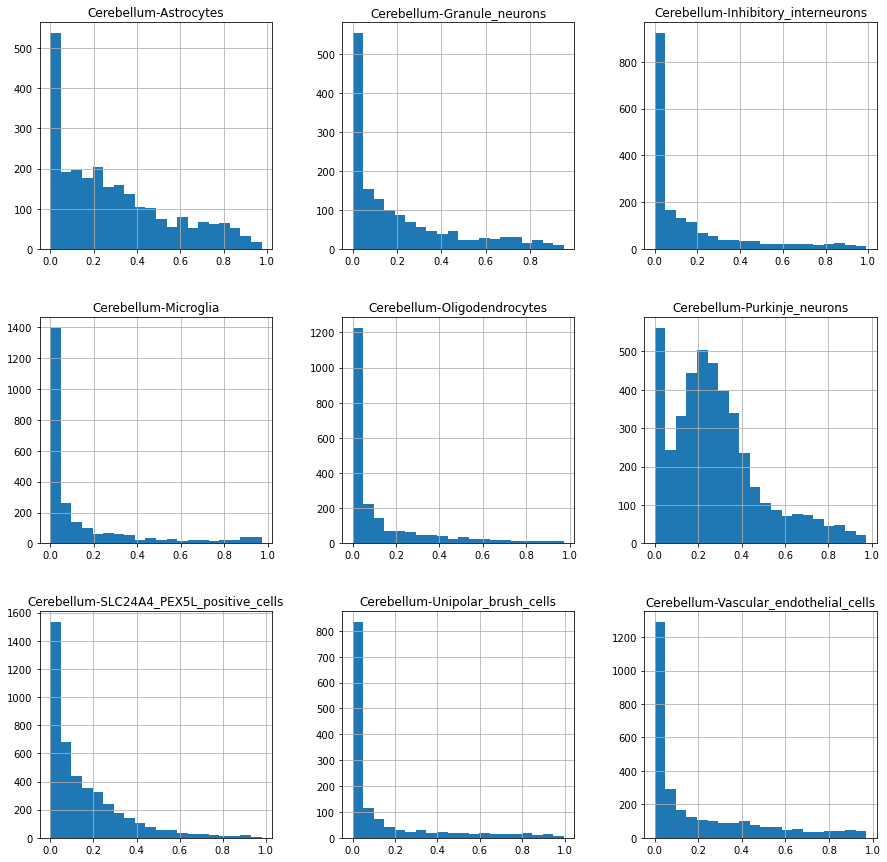

In [24]:
df[df>0].hist(bins=20, figsize=(15,15))

In [23]:
out_merged = f"{DATA_DIR}/Descartes_Human_Cerebellum.esmu.csv"
df.to_csv(out_merged)